In [14]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from pathlib import Path
import os
import sys

sys.path.append(str(Path.cwd()/'..'/'scripts'))

datapath = Path.cwd() / ".." / ".." / "cluster_results" / "useful_networks"
template = "elec_s_100_lv1.0__Co2L0-3H-T-H-B-I-solar+p3-dist1_2050_{}_{}_{}"

In [6]:
os.listdir(datapath / template.format("1", "elec", "static"))


['buses.csv',
 'config.yaml',
 'generators.csv',
 'generators_t_p.csv',
 'links.csv',
 'links_t_p0.csv',
 'links_t_p1.csv',
 'links_t_p2.csv',
 'loads.csv',
 'loads_t_pset.csv',
 'storage_units.csv',
 'storage_units_t_p.csv',
 'stores.csv',
 'store_t_e.csv']

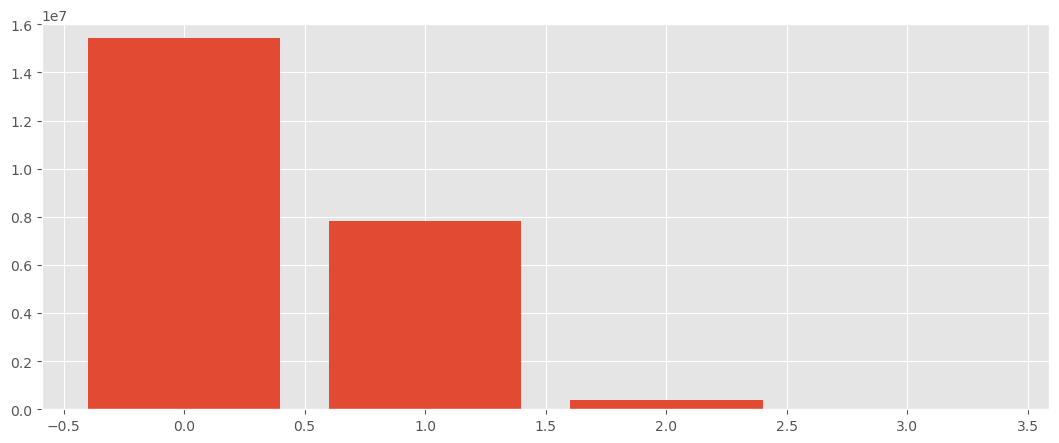

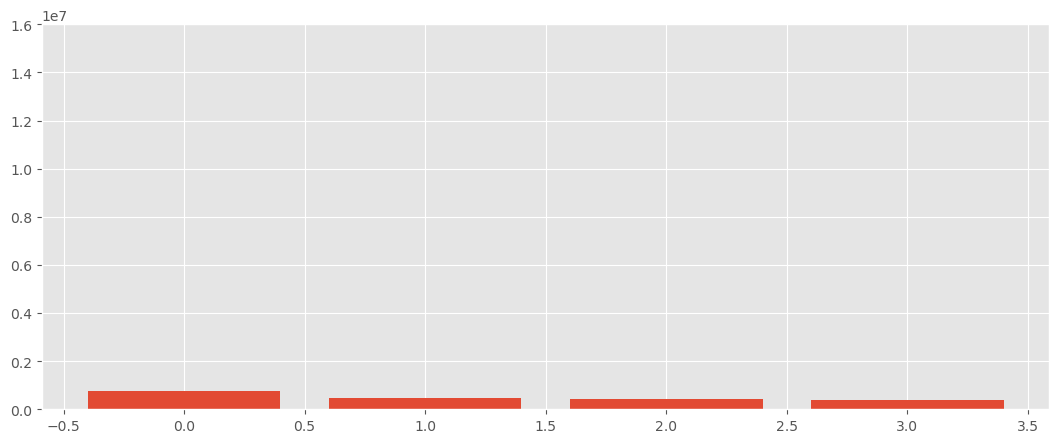

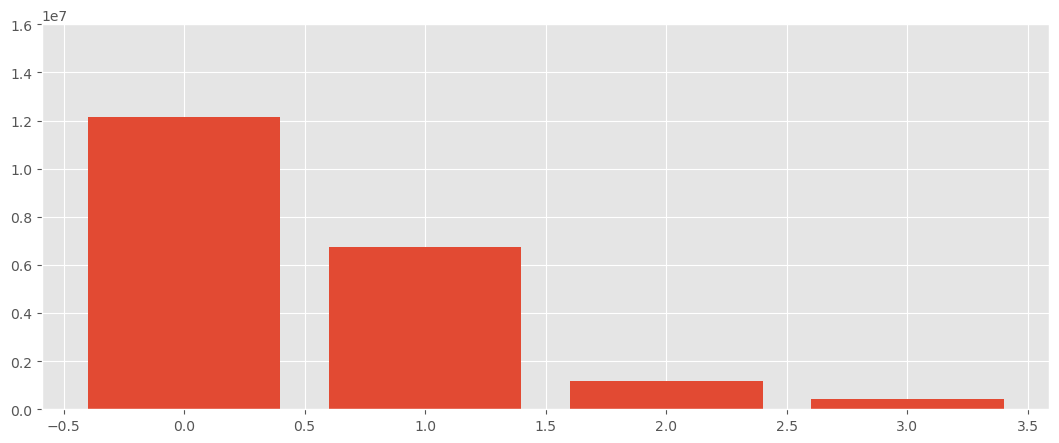

15429177.079746878

In [58]:
def assign_location(df): 

    ifind = pd.Series(df.index.str.find(" ", start=4), df.index)

    for i in ifind.unique():
        if i == -1:
            continue

        names = ifind.index[ifind == i]
        df.loc[names, "location"] = names.str[:i]

    return df


def get_p_nom_opt(path, target_regions="all"):

    links = pd.read_csv(path / "links.csv", index_col=0)
    buses = pd.read_csv(path / "buses.csv", index_col=0)

    links, buses = map(assign_location, [links, buses])

    # print(links.loc[links.carrier == "geothermal heat"][["bus0", "bus1", "bus2"]])    

    if target_regions == "all":
        regions = buses.country.unique()[:-1]
    else:
        regions = target_regions

    regions = buses.loc[buses.country.isin(regions)].index

    # links = links.loc[links.bus1.isin(regions)]
    # links = links.loc[links.carrier == "geothermal heat elec"]

    links = links.loc[links.index.str.contains("production well")]

    return links.p_nom_opt.sum()

    # print(links.p_nom_opt)


    


for tech in ['elec', 'dh', 'chp']:
    fig, ax = plt.subplots(1, 1, figsize=(13, 5))

    p_nom_opt = []
    for cost in [1, 500, 1000, 1500]:
        path = datapath / template.format(cost, tech, "static")
        p_nom_opt.append(get_p_nom_opt(path))

    
    ax.bar(range(len(p_nom_opt)), p_nom_opt)

    ax.set_ylim(0, 1.6e7)
    plt.show()




    

get_p_nom_opt(datapath / template.format("1", "elec", "static"))    

In [68]:
loads = pd.read_csv(datapath / template.format("1", "elec", "static") / "loads.csv", index_col=0)
loads_t = pd.read_csv(datapath / template.format("1", "elec", "static") / "loads_t_pset.csv", index_col=0, parse_dates=True)
loads.carrier.unique()

idx = loads.loc[loads.carrier == "residential urban decentral heat"].index
print(loads_t[idx.intersection(loads_t.columns)].sum().sum())
dec = loads_t[idx.intersection(loads_t.columns)].sum().sum()

idx = loads.loc[loads.carrier == "urban central heat"].index
print(loads_t[idx.intersection(loads_t.columns)].sum().sum())
cen = loads_t[idx.intersection(loads_t.columns)].sum().sum()

print(cen / (cen + dec))

idx = loads.loc[loads.carrier == "electricity"].index
print(loads_t[idx.intersection(loads_t.columns)].sum().sum())


208214777.43992242
502445137.2640416
0.7070120698637443
586394546.7332104


In [76]:
# regions = gpd.read_file("../../data/regions.geojson")i

onshore = gpd.read_file(datapath / "expand_data" / "regions_onshore_elec_s_100.geojson").set_index("name")
offshore = gpd.read_file(datapath / "expand_data" / "regions_offshore_elec_s_100.geojson").set_index("name")

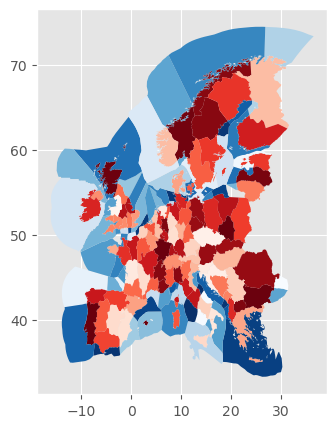

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(13, 5))

onshore["values"] = np.random.rand(len(onshore))
offshore["values"] = np.random.rand(len(offshore))

onshore.plot(ax=ax, column="values", cmap="Reds")
offshore.plot(ax=ax, column="values", cmap="Blues")

plt.show()

In [101]:
a = pd.DataFrame({"vals": [1,2,4,5]}, index=["a1", "b2", "b1", "a2"])

a.groupby(a.index.str[0]).sum()

,vals
a,6
b,6


In [102]:
df.columns

MultiIndex([('100', 'v1.0', 'Co2L0-3H-T-H-B-I-solar+p3-dist1', '2050', ...),
            ('100', 'v1.0', 'Co2L0-3H-T-H-B-I-solar+p3-dist1', '2050', ...),
            ('100', 'v1.0', 'Co2L0-3H-T-H-B-I-solar+p3-dist1', '2050', ...),
            ('100', 'v1.0', 'Co2L0-3H-T-H-B-I-solar+p3-dist1', '2050', ...),
            ('100', 'v1.0', 'Co2L0-3H-T-H-B-I-solar+p3-dist1', '2050', ...),
            ('100', 'v1.0', 'Co2L0-3H-T-H-B-I-solar+p3-dist1', '2050', ...),
            ('100', 'v1.0', 'Co2L0-3H-T-H-B-I-solar+p3-dist1', '2050', ...),
            ('100', 'v1.0', 'Co2L0-3H-T-H-B-I-solar+p3-dist1', '2050', ...),
            ('100', 'v1.0', 'Co2L0-3H-T-H-B-I-solar+p3-dist1', '2050', ...),
            ('100', 'v1.0', 'Co2L0-3H-T-H-B-I-solar+p3-dist1', '2050', ...),
            ('100', 'v1.0', 'Co2L0-3H-T-H-B-I-solar+p3-dist1', '2050', ...)],
           names=['cluster', 'll', 'opt', 'planning_horizon', 'egs_capex', 'egs_mode', 'egs_op'])

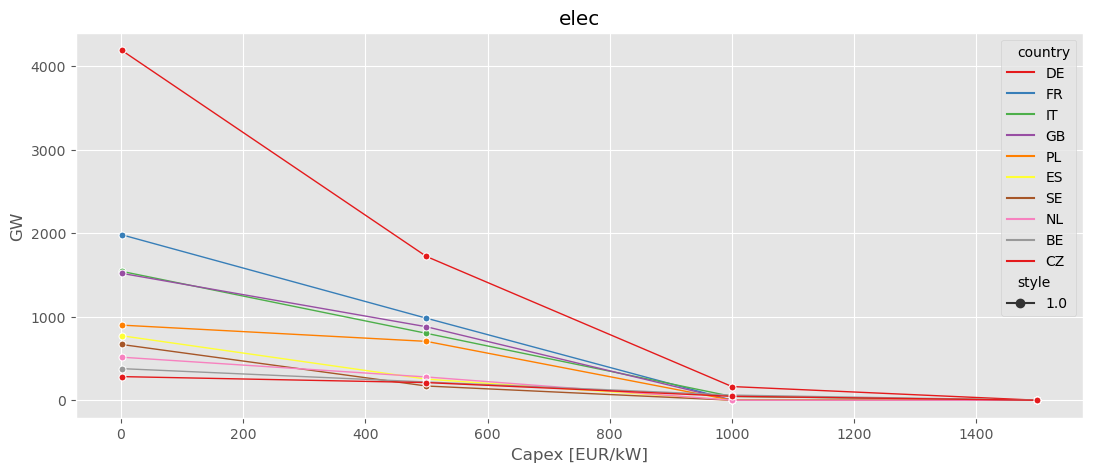

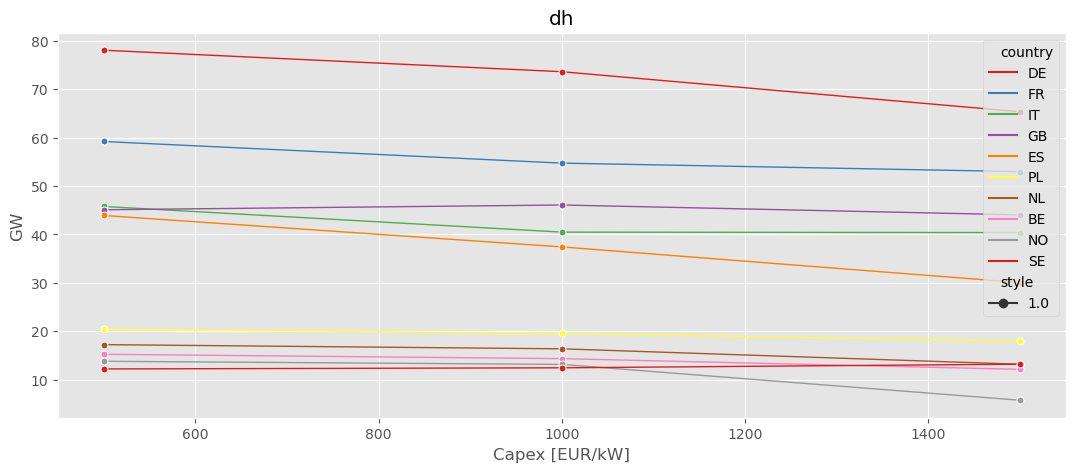

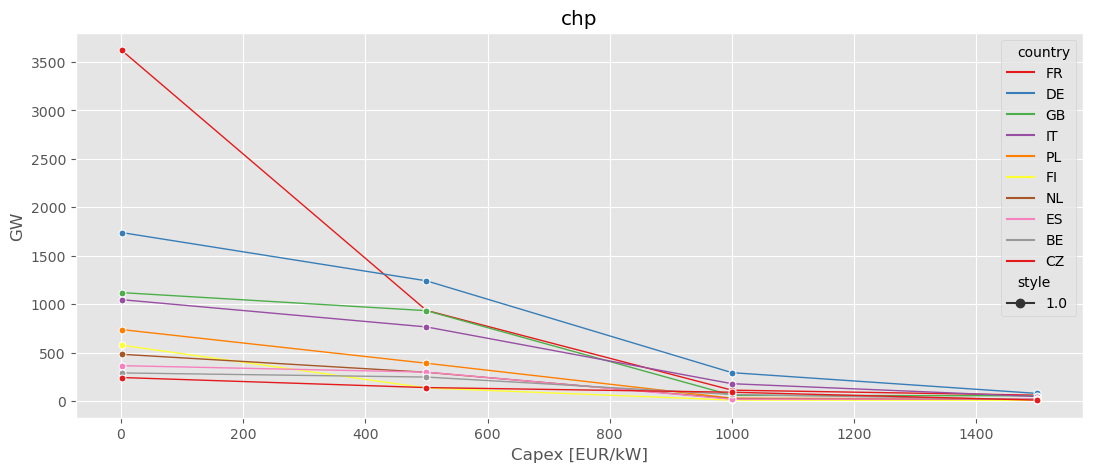

In [143]:
import seaborn as sns

nodal_caps = pd.read_csv(datapath / "expand_data" / "nodal_capacities.csv",
    index_col=[0,1,2,3],
    header=[0,1,2,3,4,5,6]
    )
idx = pd.IndexSlice
num_show = 10

df = nodal_caps.loc[
    idx[:, :, 
        ["geothermal heat elec", "geothermal heat dh", "geothermal heat chp"],
        :]
    ]

for tech in ["elec", "dh", "chp"]:

    fig, ax = plt.subplots(1, 1, figsize=(13, 5))

    data = pd.DataFrame(columns=[1, 500, 1000, 1500])

    ss = df.loc[
        idx[:, :, f"geothermal heat {tech}", :],
        idx[:, :, :, :, :, tech, :]
        ]
    ss.index = ss.index.get_level_values(1)
    ss.columns = ss.columns.get_level_values(4)
        
    ss = ss.groupby(ss.index.str[:2]).sum()

    #ss.loc["EU"] = ss.sum()
    ss = ss.sort_values(by=ss.columns[0], ascending=False).iloc[:num_show].mul(1e-3)

    ss.columns = ss.columns.astype(int)

    ss = ss.stack()

    ss = pd.DataFrame({
        "p_opt": ss.values,
        "country": ss.index.get_level_values(0),
        "capex": ss.index.get_level_values(1),
        })
    
    ss.reset_index(inplace=True)
    ss["style"] = np.ones(len(ss))

    sns.lineplot(ss,
        x="capex",
        y="p_opt",
        hue="country",
        ax=ax,
        dashes=True,
        # markers=[1, 500, 1000, 1500],
        markers=True,
        style="style",
        markersize=5,
        linewidth=1.,
        palette="Set1",
        )
    """
    sns.lineplot(ss,
        x="capex",
        y="p_opt",
        hue="country",
        ax=ax,
        dashes=True,
        # markers=[1, 500, 1000, 1500],
        # markers=True,
        # style="capex",
        markersize=10,
        linewidth=1.,
        palette="Set1"
        )
    """

    ax.set_ylabel("GW")
    ax.set_xlabel("Capex [EUR/kW]")

    ax.set_title(tech)

    plt.show()
    


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numbers = pd.DataFrame(
    {
   "costs": [180, 45, 105, 450],
   "meaning": ["nhs spending", "UK military spending", "UK education spending", "Germany Power System Spending"],
    }
)


